# Analysing the  Brazil Forest burnings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../input/forest-fires-in-brazil/amazon.csv",encoding='latin1') 

In [2]:
data.head() 

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

No missing values.

In [4]:
data.duplicated().sum()

32

32 duplicates.

In [5]:
data.drop_duplicates(inplace=True) 

In [6]:
data.drop('date',axis=1,inplace =True) 

The date features doesnt tells us much.

In [7]:
data = data.reset_index(drop=True)

Reset the index because of the drop_duplicates.

In [8]:
data = data.replace({'Piau':'Piaui',
                     'Rio':'Rio de Janeiro'})

# Graphs

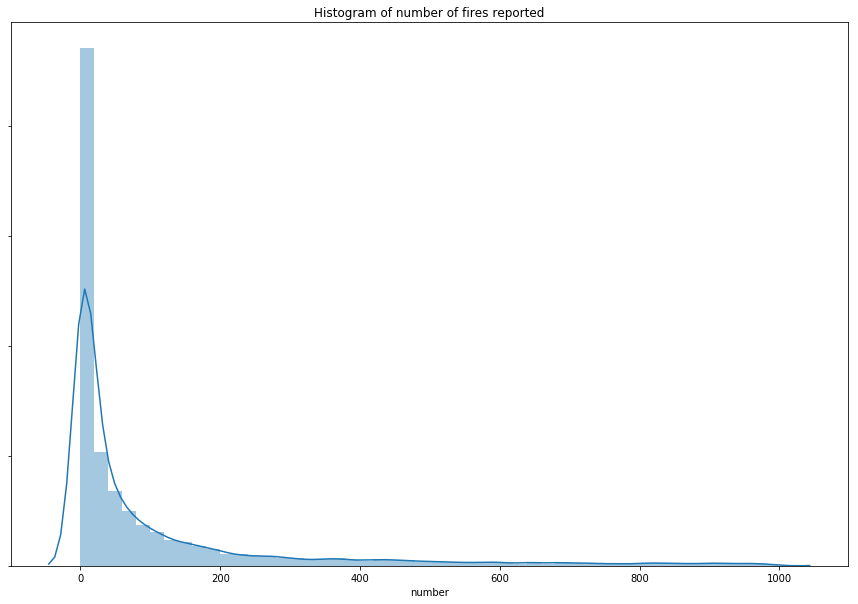

In [9]:
plt.figure(figsize=(15,10))
ax=sns.distplot(data.number)
ax = ax.set(yticklabels=[],title='Histogram of number of fires reported')

Very skewed right distribution.

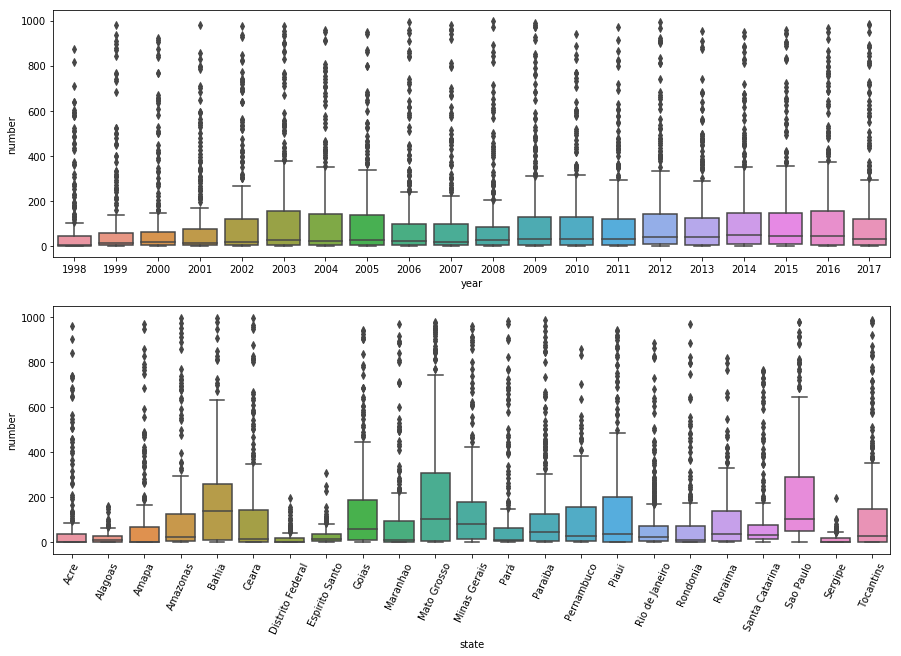

In [10]:
ax = plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
ax = sns.boxplot(data.year,data.number)

plt.subplot(2,1,2)
ax = sns.boxplot(data.state,data.number)
ax = plt.xticks(rotation=65)

In [11]:
pd.DataFrame(data.groupby(data.year).number.std())

,number
year,
1998,152.940256
1999,179.292709
2000,179.279776
2001,177.154163
2002,200.928101
2003,217.990327
2004,203.493501
2005,177.963903
2006,191.275699


In [12]:
pd.DataFrame(data.groupby(data.state).number.std())

,number
state,
Acre,182.970983
Alagoas,26.762205
Amapa,191.572878
Amazonas,224.738973
Bahia,207.614768
Ceara,223.462406
Distrito Federal,29.682323
Espirito Santo,39.681230
Goias,221.249192


We can see that we have sparse data, regarding the number of fires. The standard deviation is very high, so for the next analysis I will be using only the median, beacause using average values could lead to false conclusions.

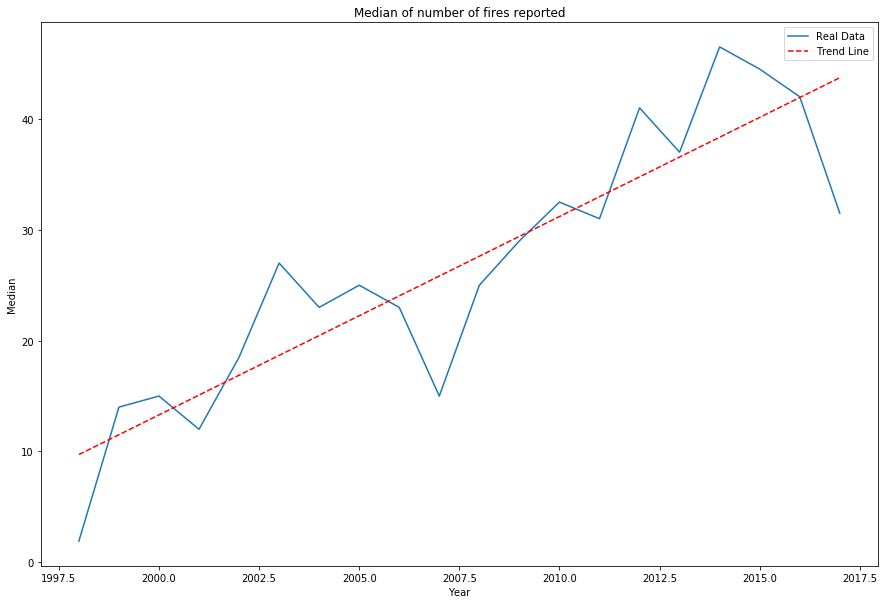

In [13]:
x = data.groupby(data.year).number.median()

ax = plt.figure(figsize=(15,10))
ax = plt.plot(x.index.values,x.values) 
ax = plt.title('Median of number of fires reported')
ax = plt.xlabel('Year')
ax = plt.ylabel('Median')

z = np.polyfit(x.index.values, x.values, 1)
p = np.poly1d(z)
ax = plt.plot(x.index.values,p(x.index.values),"r--")

ax = plt.legend(['Real Data','Trend Line'])

We can see the median number of fires reported increased during this period, and it tends to continue that way.

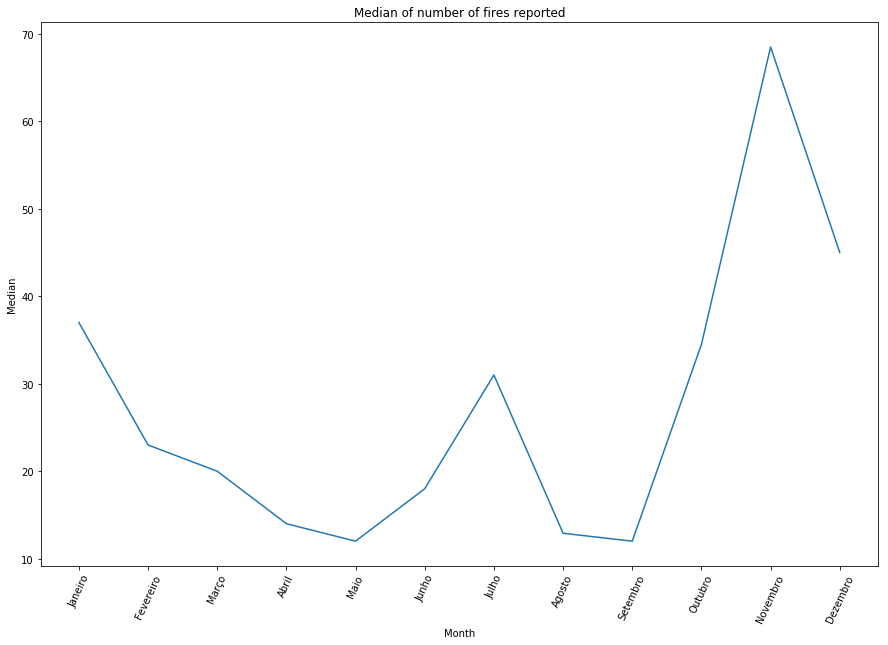

In [14]:
x = data.groupby(data.month, sort=False).number.median()
plt.figure(figsize=(15,10))
ax = plt.plot(x.index.values, x.values) 
ax = plt.xticks(rotation=65)
ax = plt.title('Median of number of fires reported')
ax = plt.xlabel('Month')
ax = plt.ylabel('Median')

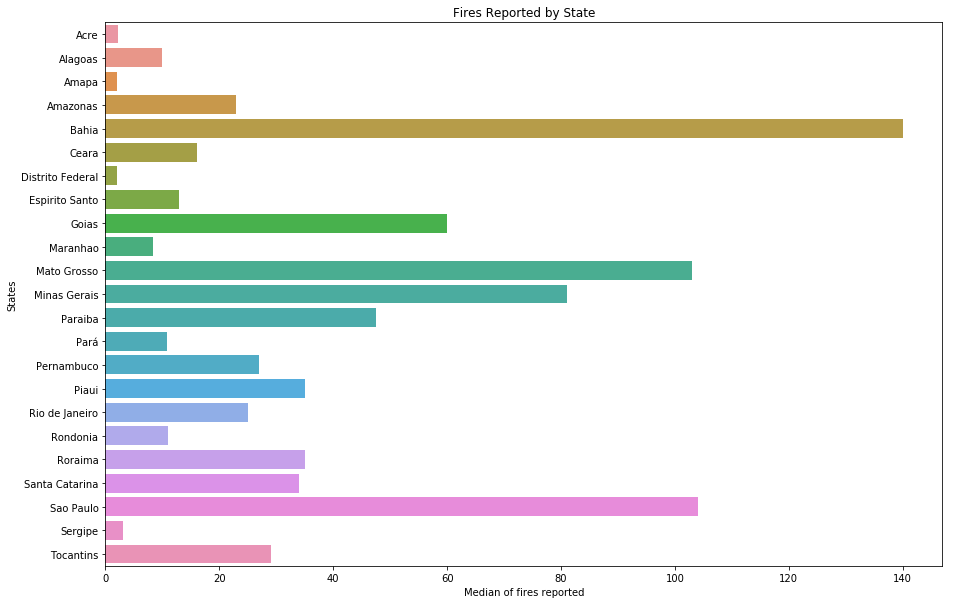

In [15]:
x = data.groupby(data.state).number.median()
plt.figure(figsize=(15,10))
ax = sns.barplot(y=x.index.values,x=x.values)
ax = ax.set(xlabel='Median of fires reported',ylabel='States',title='Fires Reported by State')

In [16]:
import geopandas as gpd

In [17]:
map_brazil = gpd.read_file('../input/brazil-geopandas-data/gadm36_BRA_1.shp')
map_brazil = map_brazil[['NAME_1','geometry']]
map_brazil = map_brazil.to_crs(epsg=4326)

In [18]:
map_brazil.head()

,NAME_1,geometry
0,Acre,"POLYGON ((-68.10552979000001 -10.72191715, -68..."
1,Alagoas,"(POLYGON ((-35.88986206 -9.844305990000001, -3..."
2,Amapá,"(POLYGON ((-50.82569504 2.522084, -50.82569504..."
3,Amazonas,"POLYGON ((-58.13698959000001 -7.35613918, -58...."
4,Bahia,"(POLYGON ((-38.69208145 -17.95958328, -38.6920..."


In [19]:
import unidecode
map_brazil['NAME_1'] = map_brazil['NAME_1'].apply(lambda x: unidecode.unidecode(x))
data['state'] = data['state'].apply(lambda x: unidecode.unidecode(x))

In [20]:
map_brazil['centroid'] = map_brazil.geometry.centroid

In [21]:
median = data.groupby('state').number.median()

map_brazil = map_brazil.join(median,on='NAME_1')

In [22]:
map_brazil.head()

,NAME_1,geometry,centroid,number
0,Acre,"POLYGON ((-68.10552979000001 -10.72191715, -68...",POINT (-70.44666617524685 -9.309916735880226),2.188
1,Alagoas,"(POLYGON ((-35.88986206 -9.844305990000001, -3...",POINT (-36.62319561662701 -9.515553613605821),10.000
2,Amapa,"(POLYGON ((-50.82569504 2.522084, -50.82569504...",POINT (-51.96103309015382 1.440043429560412),2.000
3,Amazonas,"POLYGON ((-58.13698959000001 -7.35613918, -58....",POINT (-64.71488057979403 -4.186776806608568),23.000
4,Bahia,"(POLYGON ((-38.69208145 -17.95958328, -38.6920...",POINT (-41.73007712980868 -12.47331113316646),140.000


In [23]:
data['month'] = data.month.replace(data.month.unique(),range(1,13))

/opt/conda/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


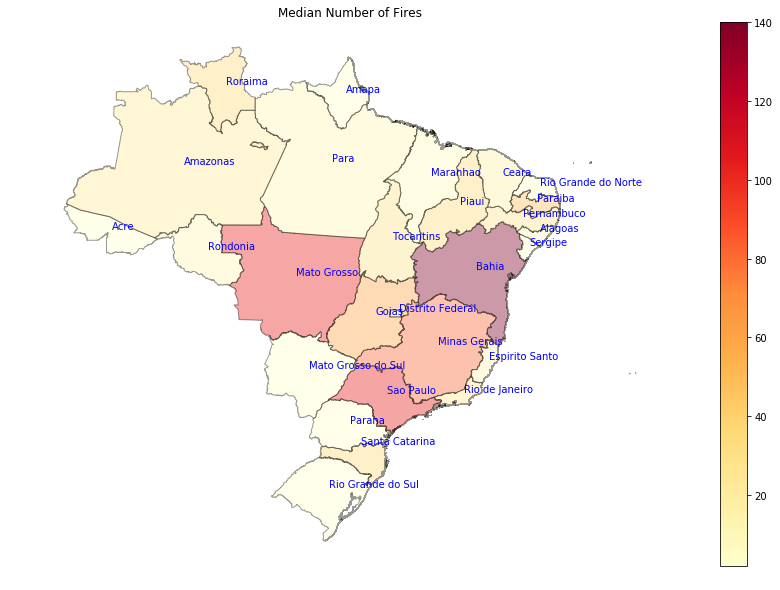

In [24]:
fig,ax = plt.subplots(figsize=(20,10))
map_brazil.plot(column='number',ax=ax,alpha=0.4,edgecolor='black',cmap='YlOrRd',legend=True)
plt.title("Median Number of Fires")
plt.axis('off')


for x, y, label in zip(map_brazil.centroid.x, map_brazil.centroid.y, map_brazil.NAME_1):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points",color='blue')

# K-means 

In [25]:
map_brazil['lat_long'] = map_brazil.centroid.apply(lambda x : x.coords[0])

In [26]:
x = map_brazil[['NAME_1','lat_long']]
x = x.set_index('NAME_1')

In [27]:
data = data.set_index('state')

In [28]:
data = data.join(x)

In [29]:
data[['x', 'y']] = pd.DataFrame(data['lat_long'].tolist(), index=data.index) 
data.drop('lat_long',axis=1,inplace=True)

In [30]:
from sklearn.cluster import KMeans

In [31]:
inertia =[] 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    inertia.append(kmeans.inertia_)

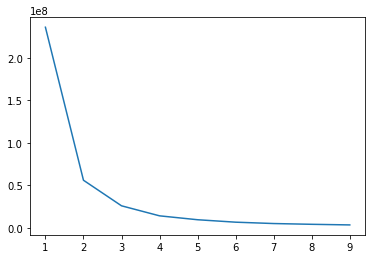

In [32]:
ax = plt.plot(range(1,10),inertia)

By the elbow method we should use 3 clusters. 

In [33]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

I'm going to use PCA for dimensionality reduction so I can plot the clusters. 

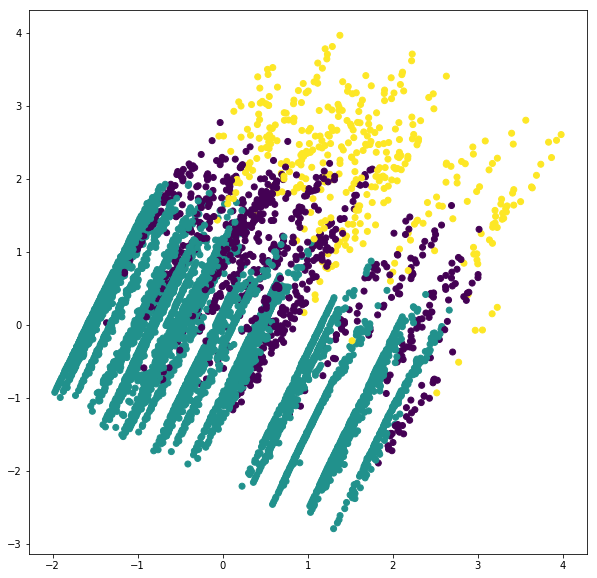

In [34]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(data)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['1', '2'])

plt.figure(figsize=(10,10))
ax = plt.scatter(principalDf['1'],principalDf['2'],c=kmeans.labels_)

In [35]:
pc = pd.DataFrame(pca.components_) 
pc.columns = data.columns 
pc

,year,month,number,x,y
0,0.075748,0.262022,0.401104,-0.644083,0.591505
1,0.189993,0.617907,0.592044,0.289145,-0.384671


The data is mainly grouped by number and state.


In [36]:
data['labels'] = kmeans.labels_

In [37]:
data.labels.value_counts() 

1    5197
0     849
2     376
Name: labels, dtype: int64

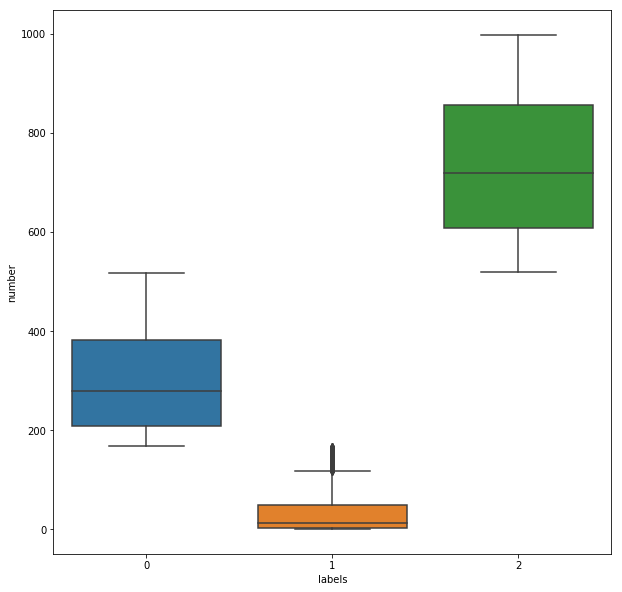

In [38]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data.labels,data.number)

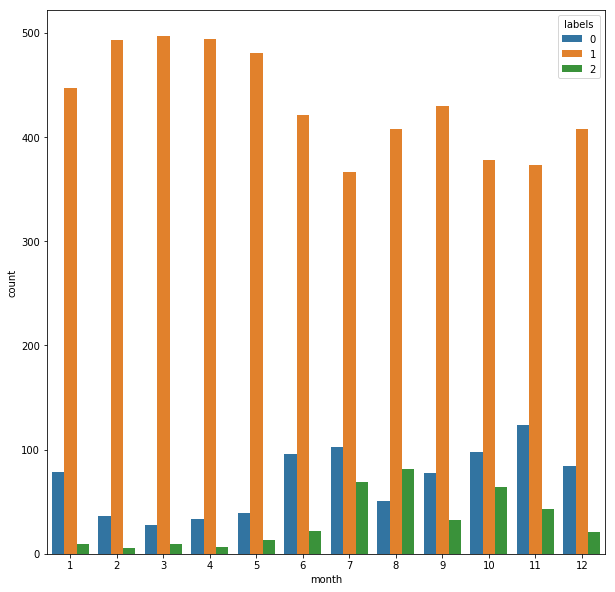

In [39]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(data.month,hue=data.labels)

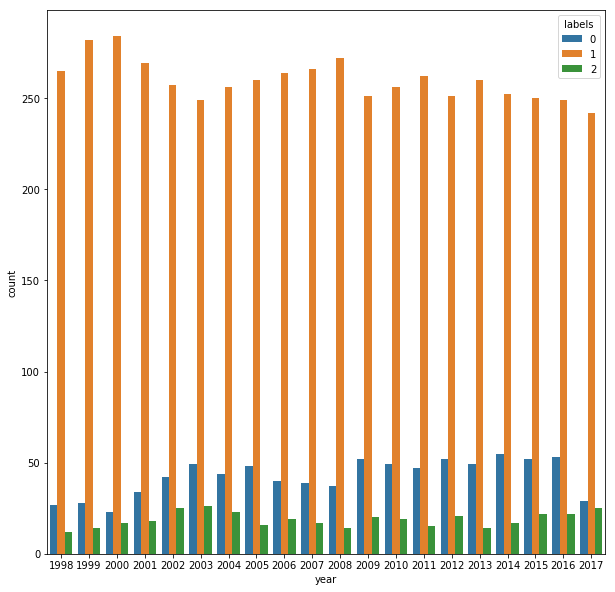

In [40]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(data.year,hue=data.labels)

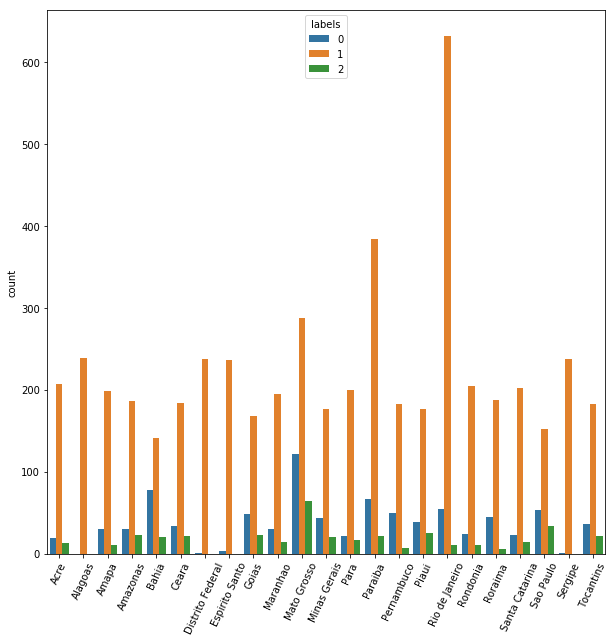

In [41]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(data.index.values,hue=data.labels)
ax = plt.xticks(rotation=65)